__Copyright 2017 Igor Vustianiuk__

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Gaussian filter
def gauss(ftimage):
    sigmax, sigmay = 50, 50
    cy, cx = nrows/2, ncols/2
    x = np.linspace(0, nrows, nrows)
    y = np.linspace(0, ncols, ncols)
    X, Y = np.meshgrid(x, y)
    gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
    return ftimage * gmask


# Clearing the high frequencies (linear approach)
def linear(ftimage):
    r = 50
    Z = np.zeros((ftimage.shape), dtype=complex)
    for i in range(255-r+1, 256+r):
        for j in range(255-r+1, 256+r):
            Z[i,j] = ftimage[i,j]
    return np.fft.ifftshift(Z)


# Clearing the high frequencies (non-linear approach)
def nonlinear(ftimage):
    thresh = 107
    for i in range(ncols):
        for j in range(nrows):
            if np.abs(ftimage[i,j]) <= thresh:
                ftimage[i,j] = 0
    return np.fft.ifftshift(ftimage)

(-0.5, 511.5, 511.5, -0.5)

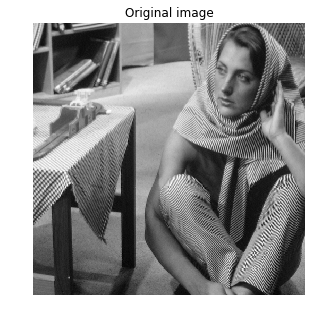

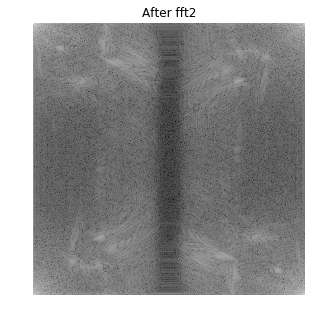

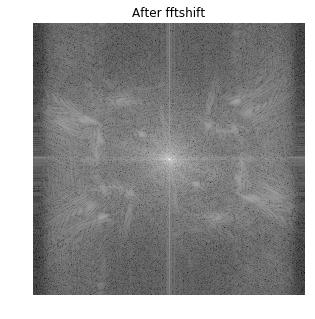

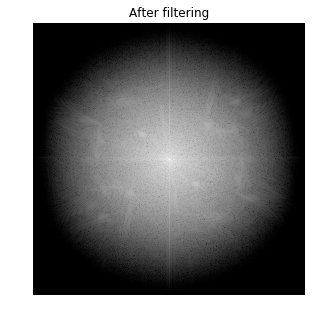

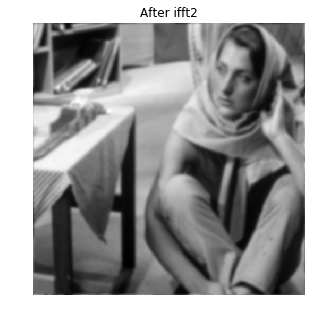

In [3]:
image = mpimg.imread('barbara.png')
(ncols, nrows) = image.shape
plt.figure(figsize = (5, 5))
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.axis('off')


# Applying 2-dimensional Fourier transform and centering the frequencies
ftimage = np.fft.fft2(image)
plt.figure(figsize = (5, 5))
plt.imshow(np.log(np.abs(ftimage) + 1e-9), cmap = 'gray')
plt.title('After fft2')
plt.axis('off')

ftimage = np.fft.fftshift(ftimage)
#print('Percentile')
#print(np.percentile(np.abs(ftimage), 96))
plt.figure(figsize = (5, 5))
plt.imshow(np.log(np.abs(ftimage) + 1e-9), cmap = 'gray')
plt.title('After fftshift')
plt.axis('off')

ftimagep = gauss(ftimage)
#ftimagep = linear(ftimage)
#ftimagep = nonlinear(ftimage)

plt.figure(figsize = (5, 5))
plt.imshow(np.log(np.abs(ftimagep) + 1e-9), cmap = 'gray')
plt.title('After filtering')
plt.axis('off')

# Applying inverse Fourier transform
imagep = np.fft.ifft2(ftimagep)
plt.figure(figsize = (5, 5))
plt.imshow(np.abs(imagep), cmap = 'gray')
plt.title('After ifft2')
plt.axis('off')

Percentile
1.0156039965333397


(-0.5, 511.5, 511.5, -0.5)

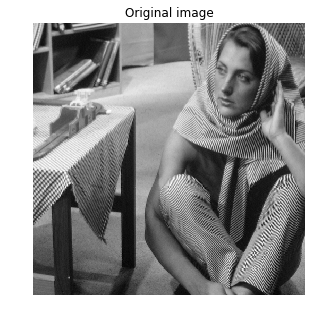

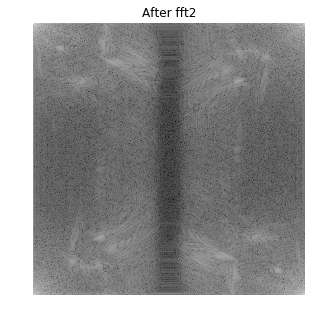

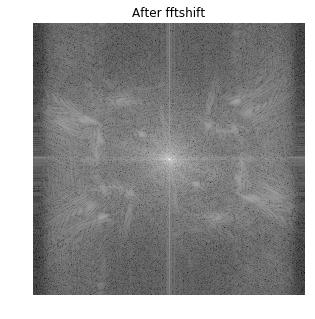

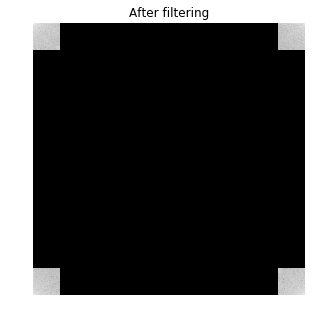

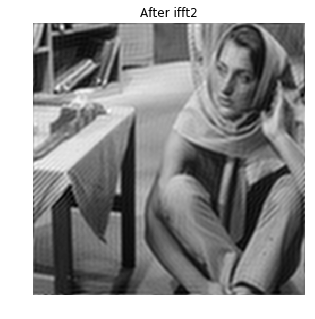

In [4]:
image = mpimg.imread('barbara.png')
(ncols, nrows) = image.shape
plt.figure(figsize = (5, 5))
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.axis('off')


# Applying 2-dimensional Fourier transform and centering the frequencies
ftimage = np.fft.fft2(image)
plt.figure(figsize = (5, 5))
plt.imshow(np.log(np.abs(ftimage) + 1e-9), cmap = 'gray')
plt.title('After fft2')
plt.axis('off')

ftimage = np.fft.fftshift(ftimage)
print('Percentile')
print(np.percentile(np.abs(ftimage), 4))
plt.figure(figsize = (5, 5))
plt.imshow(np.log(np.abs(ftimage) + 1e-9), cmap = 'gray')
plt.title('After fftshift')
plt.axis('off')

#ftimagep = gauss(ftimage)
ftimagep = linear(ftimage)
#ftimagep = nonlinear(ftimage)

plt.figure(figsize = (5, 5))
plt.imshow(np.log(np.abs(ftimagep) + 1e-9), cmap = 'gray')
plt.title('After filtering')
plt.axis('off')

# Applying inverse Fourier transform
imagep = np.fft.ifft2(ftimagep)
plt.figure(figsize = (5, 5))
plt.imshow(np.abs(imagep), cmap = 'gray')
plt.title('After ifft2')
plt.axis('off')